In [4]:
'''
  File: FunkSensorDriftAnalysis.ipynb
  Description: Observing before and after cases of sensor drift.
  Author: Johnathan Evans And Ben Funk
  Created: 05/30/2023
  Updated: ...
'''
#imports
import numpy as np
import pandas as pd
import scipy as sc
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

"Borrowed"
def selectPeriods(df, delta_t):
    pointer = 5
    endSpots = []
    setPoints = []
    while pointer < len(df) - 3:
        if (int(df.loc[pointer, 'Target ppm']) - int(df.loc[pointer - 1, 'Target ppm'])) != 0:
            endSpots.append(pointer - 1)
            pointer += 1
        else:
            pointer += 1
    endSpots.append(len(df) - 3)
    for item in endSpots:
        setPoints.append([item - delta_t, item])
    return setPoints


In [5]:
# Define the function to extract data
def extract_data(filename):
    pdadata = pd.read_csv(filename)
    indexes = selectPeriods(pdadata, 120)
    data=pd.DataFrame()
    for i in range(0, len(indexes)):
        data2 = pdadata.loc[indexes[i][0]:indexes[i][1],:]
        data=pd.concat([data,data2], ignore_index=True)
    Vout = data.iloc[:, 4].astype(float)
    Vref = data.iloc[:, 20].astype(float)
    extracted_data = (Vref * (5 - Vout)) / (Vout * (5 - Vref))
    return data, extracted_data

# Read and extract data from the first CSV file
file1 = '/Users/benfunk/DataspellProjects/MethaneDataScience/Johnathan Work/JohnathanDataStorage/0C%5Best.csv'
print("file1")
df1,data1 = extract_data(file1)

# Read and extract data from the second CSV file
file2 = '/Users/benfunk/DataspellProjects/MethaneDataScience/Johnathan Work/JohnathanDataStorage/0C%5Re.csv'
print("file2")
df2,data2 = extract_data(file2)
data2=data2*1.0

file1
file2


In [6]:
# Making the resistance ratio easier to access and manage
for s in range(0, 16):
    tempResistance = (df1['Vref' + str(s)] * (5 - df1['Vout' + str(s)])) / (
            (df1['Vout' + str(s)]) * (5 - df1['Vref' + str(s)]))
    tempFrame = pd.DataFrame(tempResistance, columns=['Resistance' + str(s)])
    df1 = pd.concat([df1, tempFrame], axis=1)

for s in range(0, 16):
    tempResistance = (df2['Vref' + str(s)] * (5 - df2['Vout' + str(s)])) / (
            (df2['Vout' + str(s)]) * (5 - df2['Vref' + str(s)]))
    tempFrame = pd.DataFrame(tempResistance, columns=['Resistance' + str(s)])
    df2 = pd.concat([df2, tempFrame], axis=1)

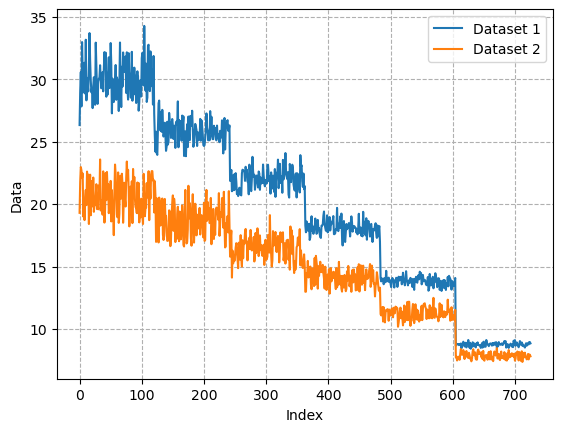

In [7]:
# Plot the datasets against each other

plt.plot(data1, label='Dataset 1')
plt.plot(data2, label='Dataset 2')

# Include horizontal gridlines
plt.grid(True, linestyle='--')

# Add labels and legend
plt.xlabel('Index')
plt.ylabel('Data')
plt.legend()

# Display the plot
plt.show()

In [8]:
target_ppm = df1['Target ppm']
extracted_data1 = data1.groupby(target_ppm).mean()
target_ppm2 = df2['Target ppm']
extracted_data2 = data2.groupby(target_ppm2).mean()
data_diff=extracted_data1/extracted_data2

print(extracted_data1/extracted_data2)

Target ppm
0     1.451559
2     1.379599
5     1.338084
10    1.283503
20    1.228191
50    1.114560
dtype: float64


Fitted function parameters: a=0.330, b=0.056, c=1.101


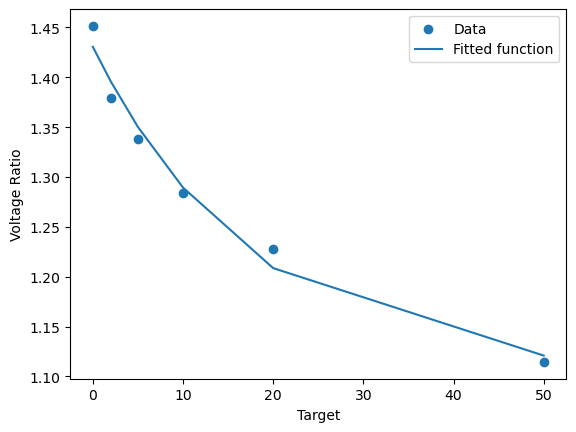

In [9]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Given data
data = {'Target': [0, 2, 5, 10, 20, 50],
        'Voltage': [1.451559, 1.379599, 1.338084, 1.283503, 1.228191, 1.114560]}
df = pd.DataFrame(data)

# Define the function to be fit to the data
def exp_func(X, a, b, c):
    x = X
    return (a * np.exp(-b * x) + c)

# Use curve_fit to fit the defined function to the data
params, params_covariance = curve_fit(exp_func, df['Target'], df['Voltage'])

# Print the parameters of the fitting function
print('Fitted function parameters: a=%.3f, b=%.3f, c=%.3f' % (params[0], params[1], params[2]))

# Use the fitted parameters to generate y data from the function
y_fit = exp_func(df['Target'], params[0], params[1], params[2])

# Plot the original data as points
plt.scatter(df['Target'], df['Voltage'], label='Data')

# Plot the fitted function as a line
plt.plot(df['Target'], y_fit, label='Fitted function')

# Add labels and legend
plt.xlabel('Target')
plt.ylabel('Voltage Ratio')
plt.legend()

# Display the plot
plt.show()


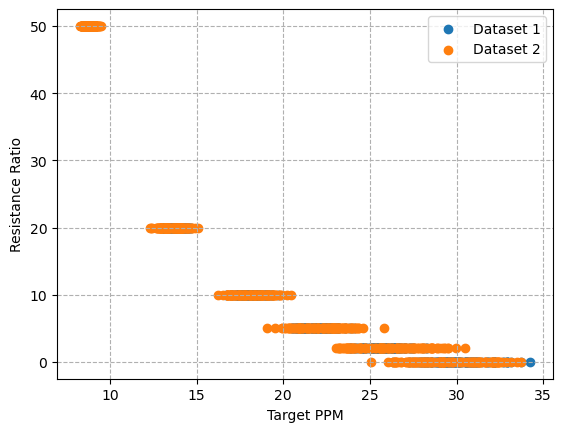

In [10]:
# Plotting the Data after normalization
normalization2 = exp_func(target_ppm2,*params)
data2=data2*normalization2
plt.scatter(data1, df1['Target ppm'], label='Dataset 1')
plt.scatter(data2,df2['Target ppm'], label='Dataset 2')

# Include horizontal gridlines
plt.grid(True, linestyle='--')

# Add labels and legend
plt.xlabel('Target PPM')
plt.ylabel('Resistance Ratio')
plt.legend()

# Display the plot
plt.show()

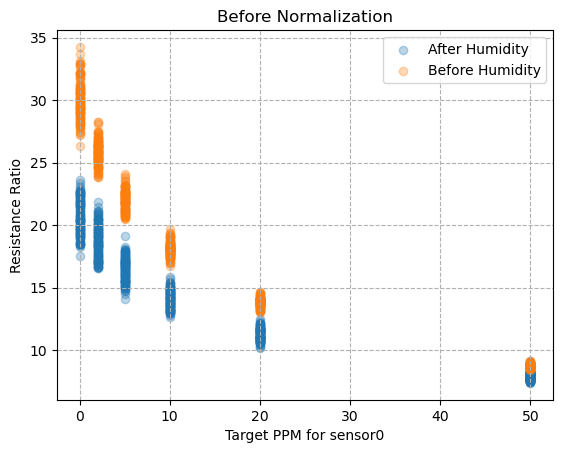

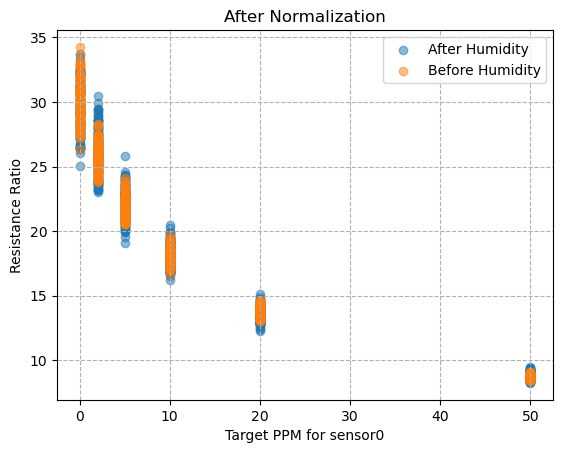

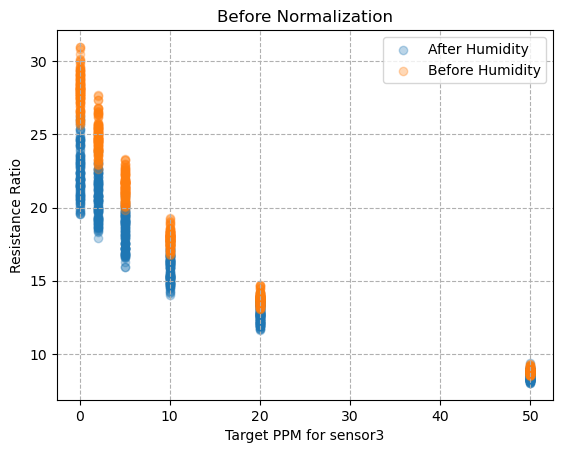

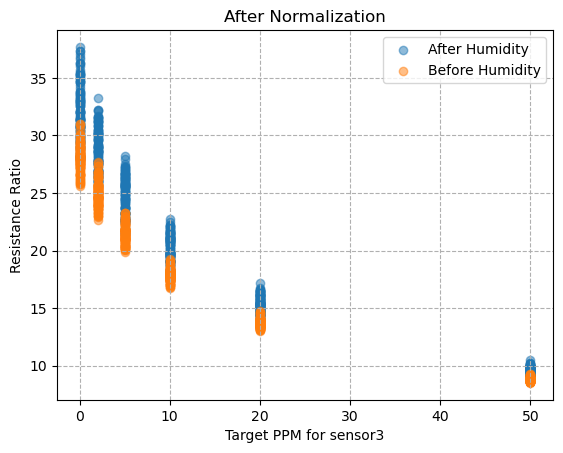

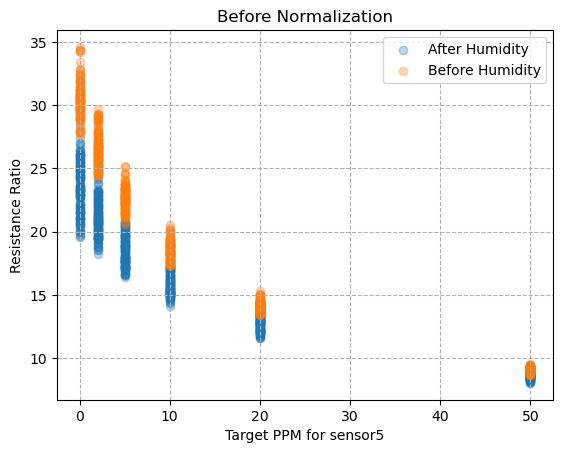

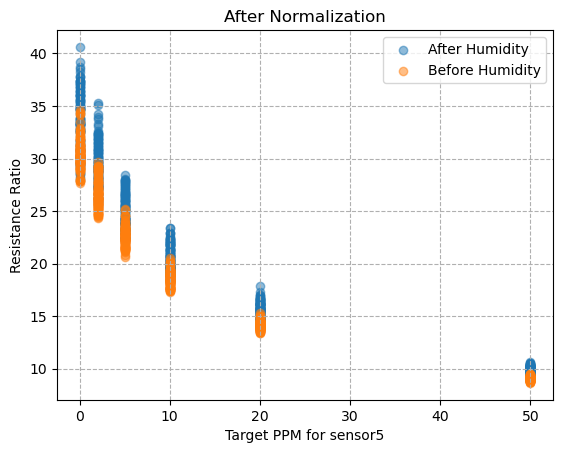

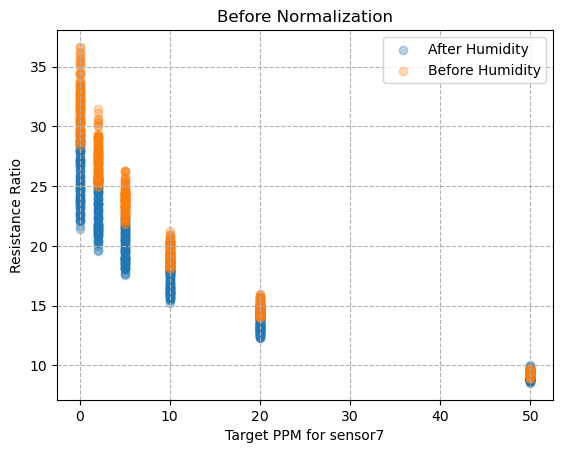

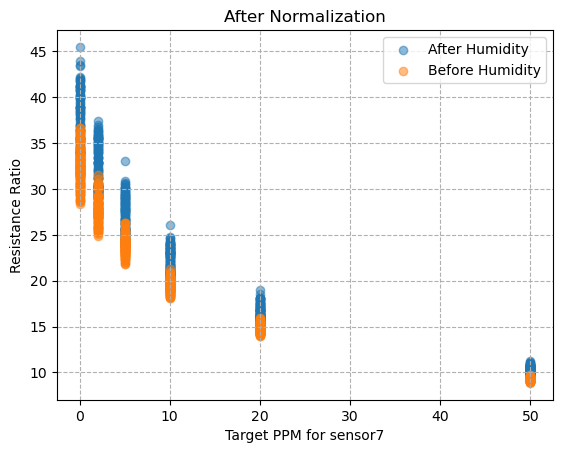

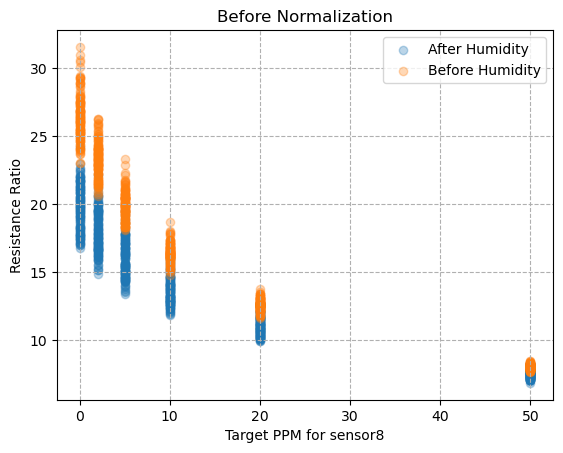

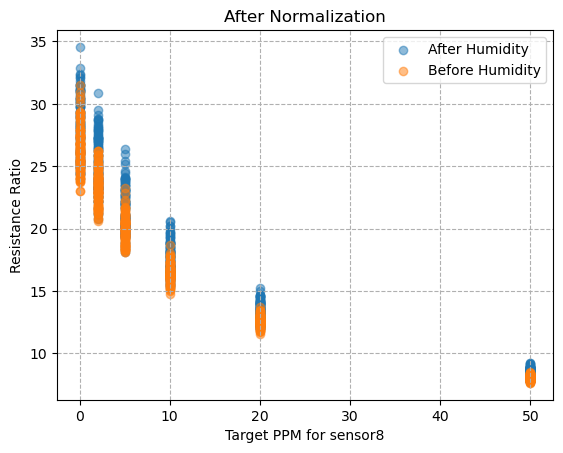

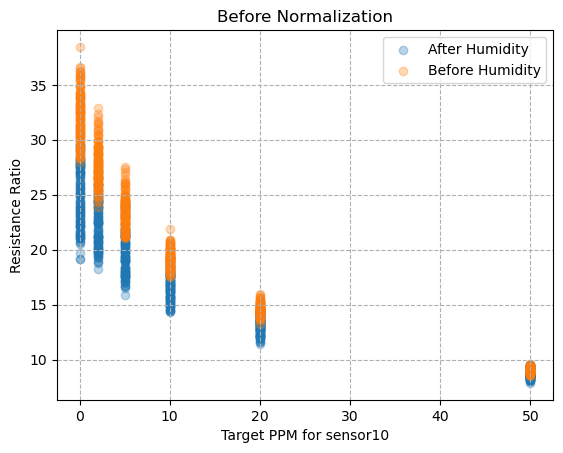

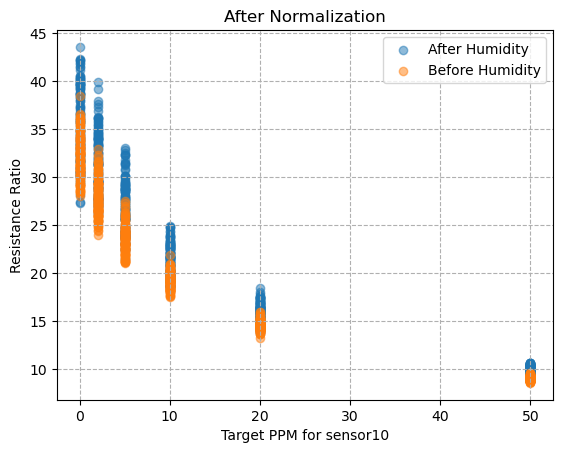

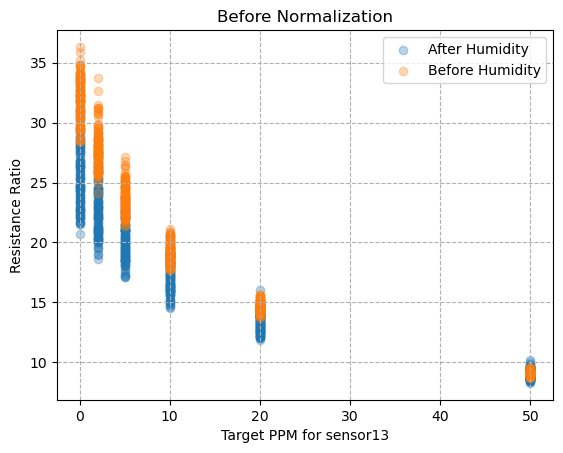

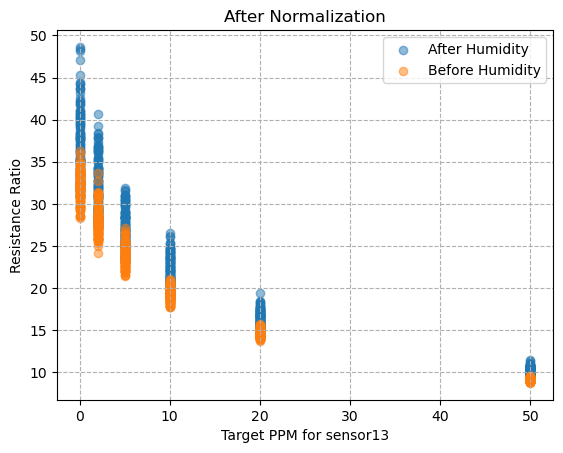

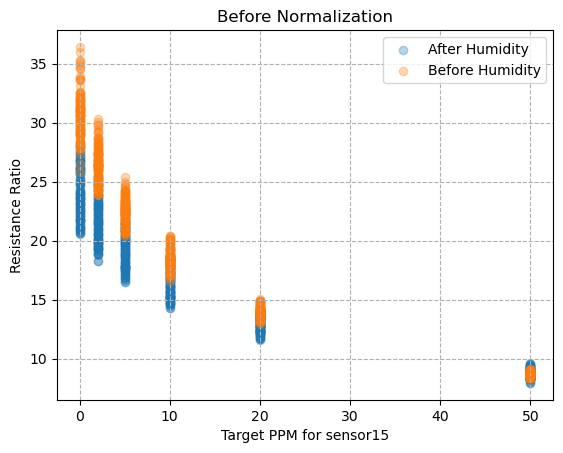

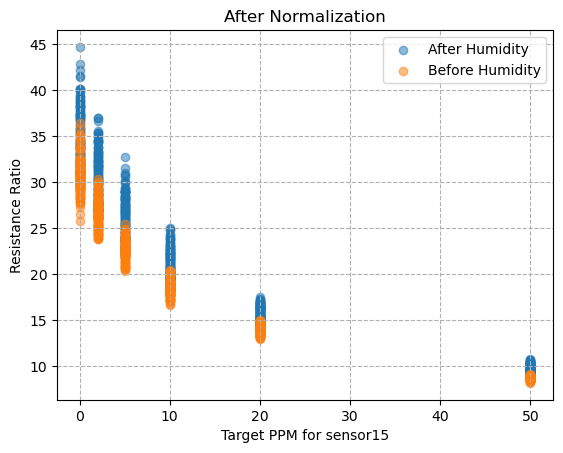

In [11]:

for s in [0,3,5,7,8,10,13,15]:
    # Data preparation
    plt.scatter(df2['Target ppm'], df2['Resistance' + str(s)], label='After Humidity', alpha=0.3)
    plt.scatter(df1['Target ppm'], df1['Resistance' + str(s)], label='Before Humidity', alpha=0.3)


    plt.grid(True, linestyle='--')
    plt.xlabel('Target PPM for sensor'+ str(s))
    plt.ylabel('Resistance Ratio')
    plt.title('Before Normalization')
    plt.legend()
    plt.show()

    # After normalization
    normalization2 = exp_func(target_ppm2,*params)
    data2=df2['Resistance' + str(s)]*normalization2

    plt.scatter(df2['Target ppm'], data2, label='After Humidity', alpha=0.5)
    plt.scatter(df1['Target ppm'], df1['Resistance' + str(s)], label='Before Humidity', alpha=0.5)


    plt.grid(True, linestyle='--')
    plt.xlabel('Target PPM for sensor'+ str(s))
    plt.ylabel('Resistance Ratio')
    plt.title('After Normalization')
    plt.legend()
    plt.show()


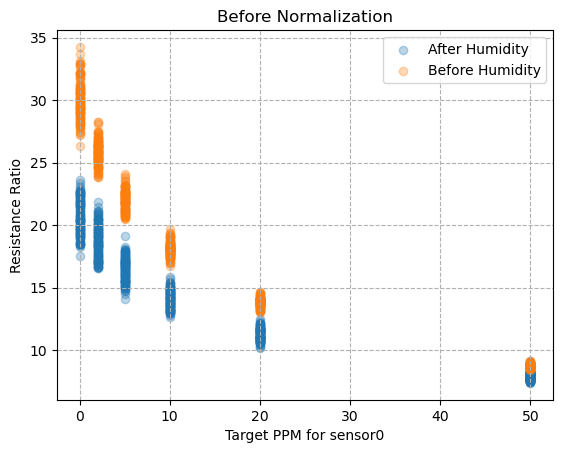

The difference in mean is now: 2.4121788427711977


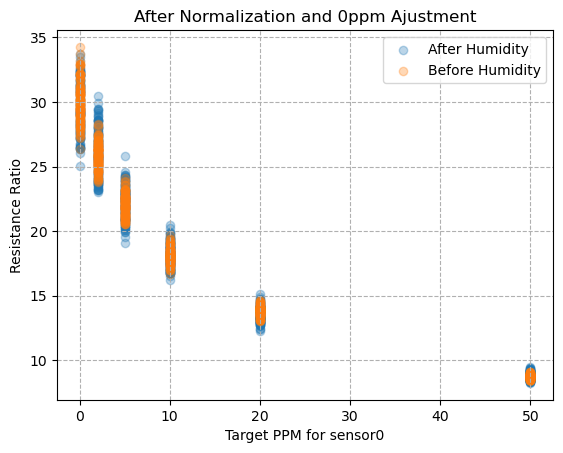

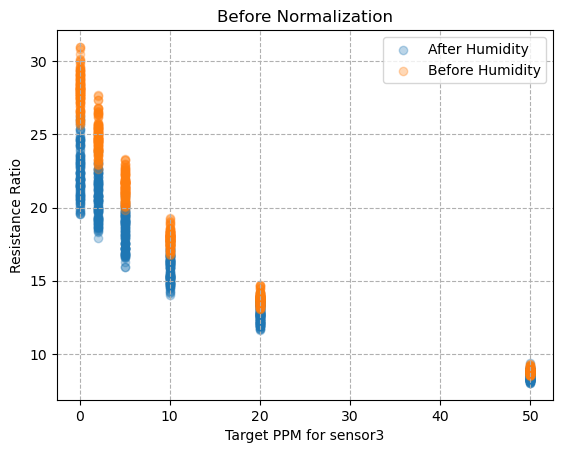

The difference in mean is now: 2.6655196825555727


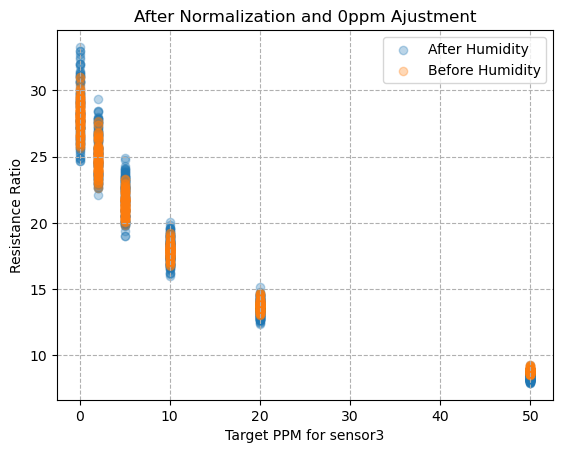

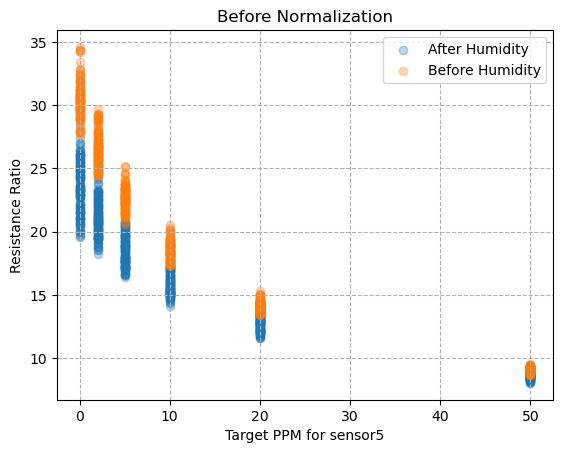

The difference in mean is now: -0.5917944870382783


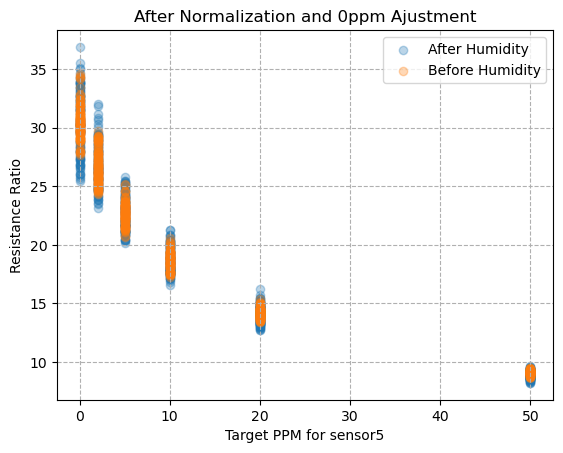

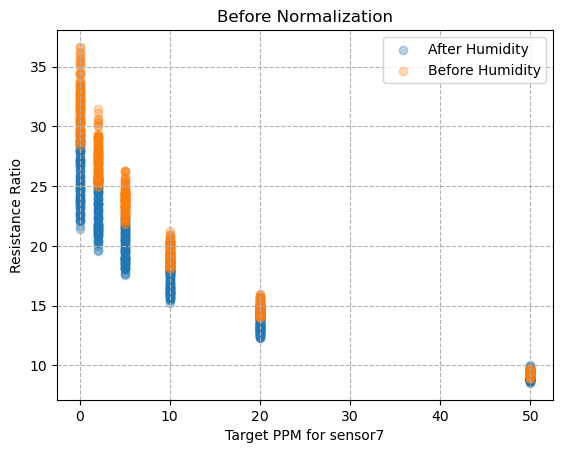

The difference in mean is now: -2.178411186746537


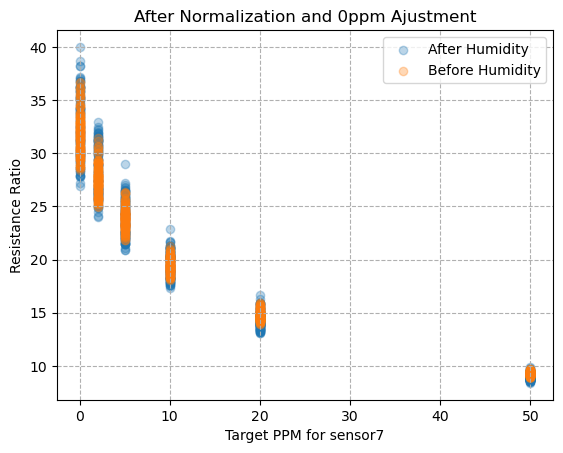

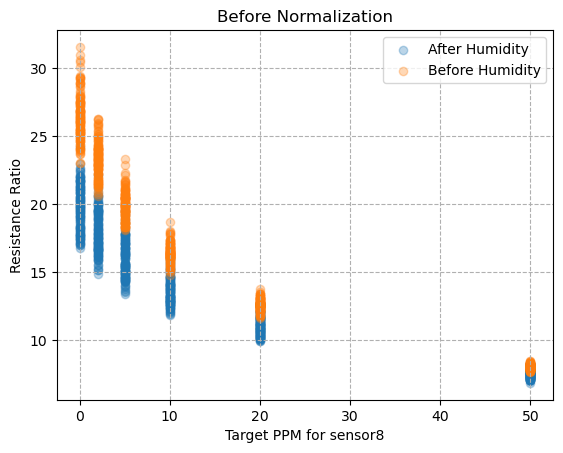

The difference in mean is now: -2.6293877758674533


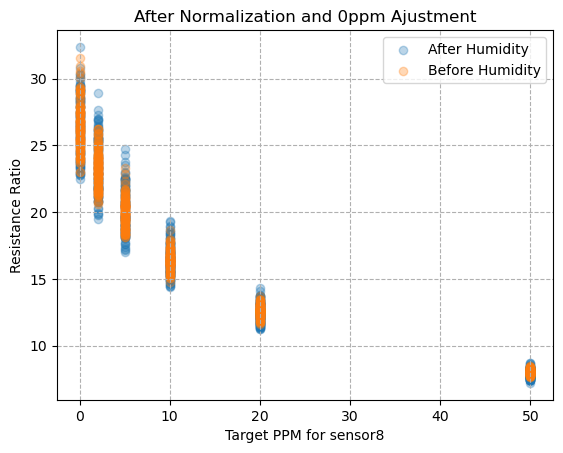

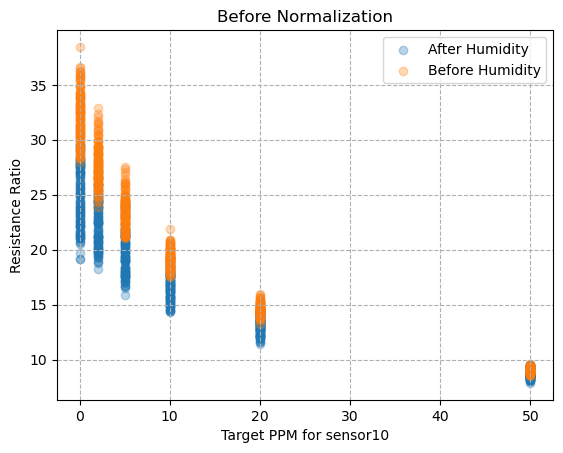

The difference in mean is now: -5.38716715992458


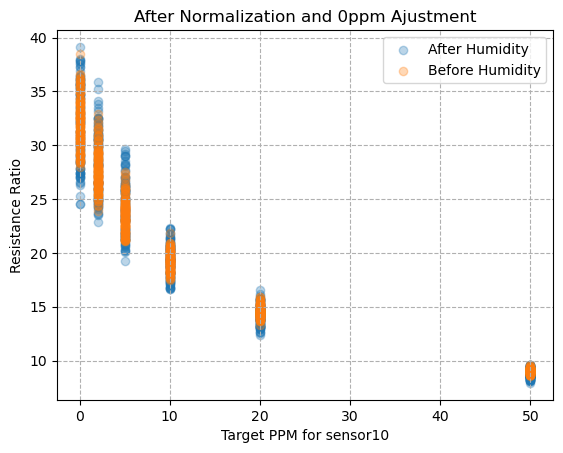

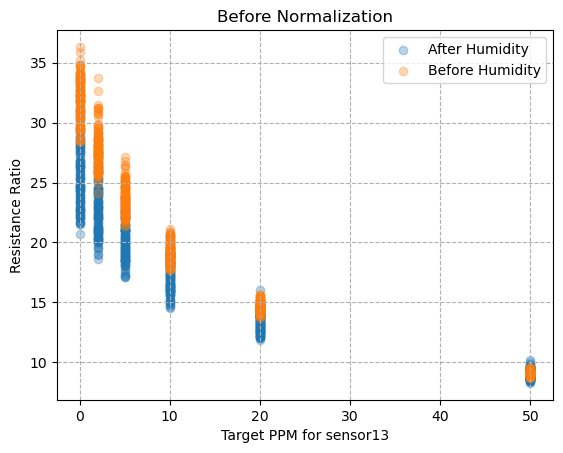

The difference in mean is now: -6.761531702770654


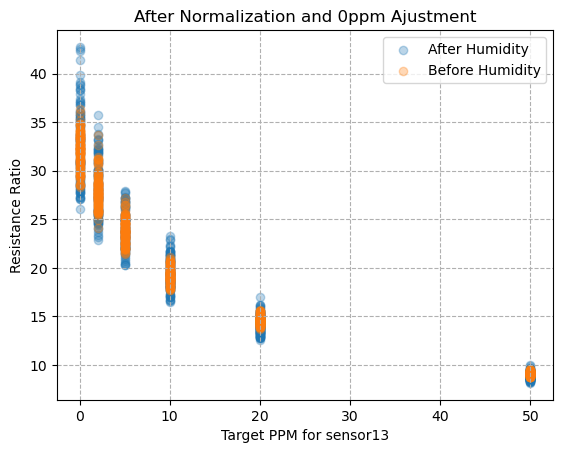

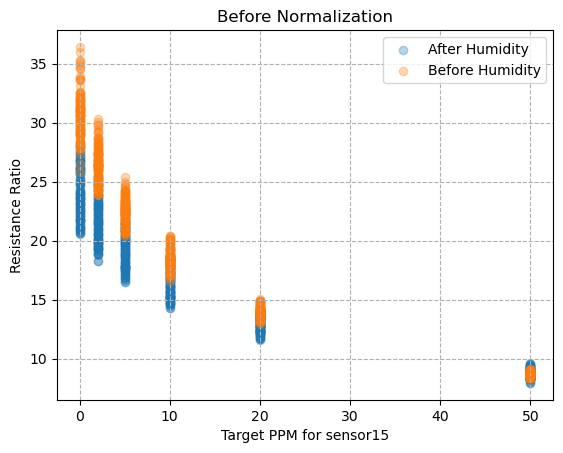

The difference in mean is now: -1.7425652325956342


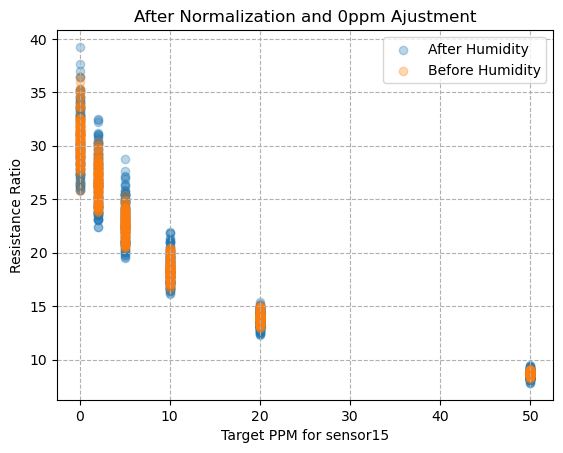

Sensor 0 : 1.0000071402492439
Sensor 3 : 0.8826107973623025
Sensor 5 : 0.9084056188480688
Sensor 7 : 0.8795096760012102
Sensor 8 : 0.9368884635351248
Sensor 10 : 0.8977717199845859
Sensor 13 : 0.8785940591015354
Sensor 15 : 0.877301426660326


In [15]:
# Perfect normalization
data_diff_dict = {} # Create an empty dictionary to store data_diff values
for s in [0,3,5,7,8,10,13,15]:
    plt.scatter(df2['Target ppm'], df2['Resistance' + str(s)], label='After Humidity', alpha=0.3)
    plt.scatter(df1['Target ppm'], df1['Resistance' + str(s)], label='Before Humidity', alpha=0.3)

    # Include horizontal gridlines
    plt.grid(True, linestyle='--')

    # Add labels and legend
    plt.xlabel('Target PPM for sensor' + str(s))
    plt.ylabel('Resistance Ratio')
    plt.title('Before Normalization')
    plt.legend()
    plt.show()

    normalization2 = exp_func(target_ppm2,*params)
    data2=df2['Resistance' + str(s)]*normalization2

    target_ppm = df1['Target ppm']
    extracted_data1 = df1['Resistance' + str(s)].groupby(target_ppm).mean()
    target_ppm2 = df2['Target ppm']
    extracted_data2 = data2.groupby(target_ppm2).mean()
    data_diff=(extracted_data1/extracted_data2).mean()

    # Store the data_diff for each sensor in the dictionary
    data_diff_dict[s] = data_diff

    meanDiff=extracted_data1-(data2*data_diff)
    print("The difference in mean is now: " + str(meanDiff[0]))

    plt.scatter(df2['Target ppm'], data2*data_diff, label='After Humidity', alpha=0.3)
    plt.scatter(df1['Target ppm'], df1['Resistance' + str(s)], label='Before Humidity', alpha=0.3)

    # Include horizontal gridlines
    plt.grid(True, linestyle='--')

    # Add labels and legend
    plt.xlabel('Target PPM for sensor' + str(s))
    plt.ylabel('Resistance Ratio')
    plt.title('After Normalization and 0ppm Ajustment')
    plt.legend()

    # Display the plot
    plt.show()

# Print all data_diff values at once
for sensor, diff in data_diff_dict.items():
    print(f"Sensor {sensor} : {diff}")
